In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,precision_recall_curve, confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

In [12]:
pd.options.display.max_columns

20

In [13]:
df= pd.read_csv('../data/processed/df_genus_encoded.csv')
df.shape

(12000, 25)

In [14]:
df.head()

,Genus_&_Specie,genero_etiqueta,Time,Location_encoded,Zone_encoded,Habitat_encoded,Incisor_Size_encoded,Jaw_Shape_encoded,Torus_Supraorbital_encoded,Prognathism_encoded,...,tecno_type_mapping_encoded,Biped_encoded,foots_encoded,Diet_encoded,Sexual_Dimorphism_encoded,Hip_encoded,Vertical_Front_encoded,Anatomy_encoded,Migrated_encoded,genero_especie_num
0,hominino Orrorin tugenencin,Homininos,6.041124,0,1,0.083333,2,4,1,1,...,0,0,0,4,0,1,0,0,0,0
1,hominino Ardipithecus ramidus / kabadda,Homininos,4.383910,0,1,0.250000,2,4,1,1,...,0,1,0,2,1,1,0,0,0,2
2,Australopithecus Afarensis,Australopithecus,3.749413,0,1,0.250000,4,3,1,1,...,0,2,1,4,0,0,0,0,0,5
3,Australopithecus Anamensis,Australopithecus,4.595606,0,1,0.083333,4,3,1,1,...,0,2,0,4,0,1,0,1,0,4
4,Australopithecus Africanus,Australopithecus,3.614060,0,2,0.083333,2,4,1,2,...,0,2,0,4,0,1,1,0,0,7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Genus_&_Specie              12000 non-null  object 
 1   genero_etiqueta             12000 non-null  object 
 2   Time                        12000 non-null  float64
 3   Location_encoded            12000 non-null  int64  
 4   Zone_encoded                12000 non-null  int64  
 5   Habitat_encoded             12000 non-null  float64
 6   Incisor_Size_encoded        12000 non-null  int64  
 7   Jaw_Shape_encoded           12000 non-null  int64  
 8   Torus_Supraorbital_encoded  12000 non-null  int64  
 9   Prognathism_encoded         12000 non-null  int64  
 10  Foramen_encoded             12000 non-null  int64  
 11  Canine_Size_encoded         12000 non-null  int64  
 12  Canines_Shape_encoded       12000 non-null  int64  
 13  Tooth_Enamel_encoded        120

<Axes: >

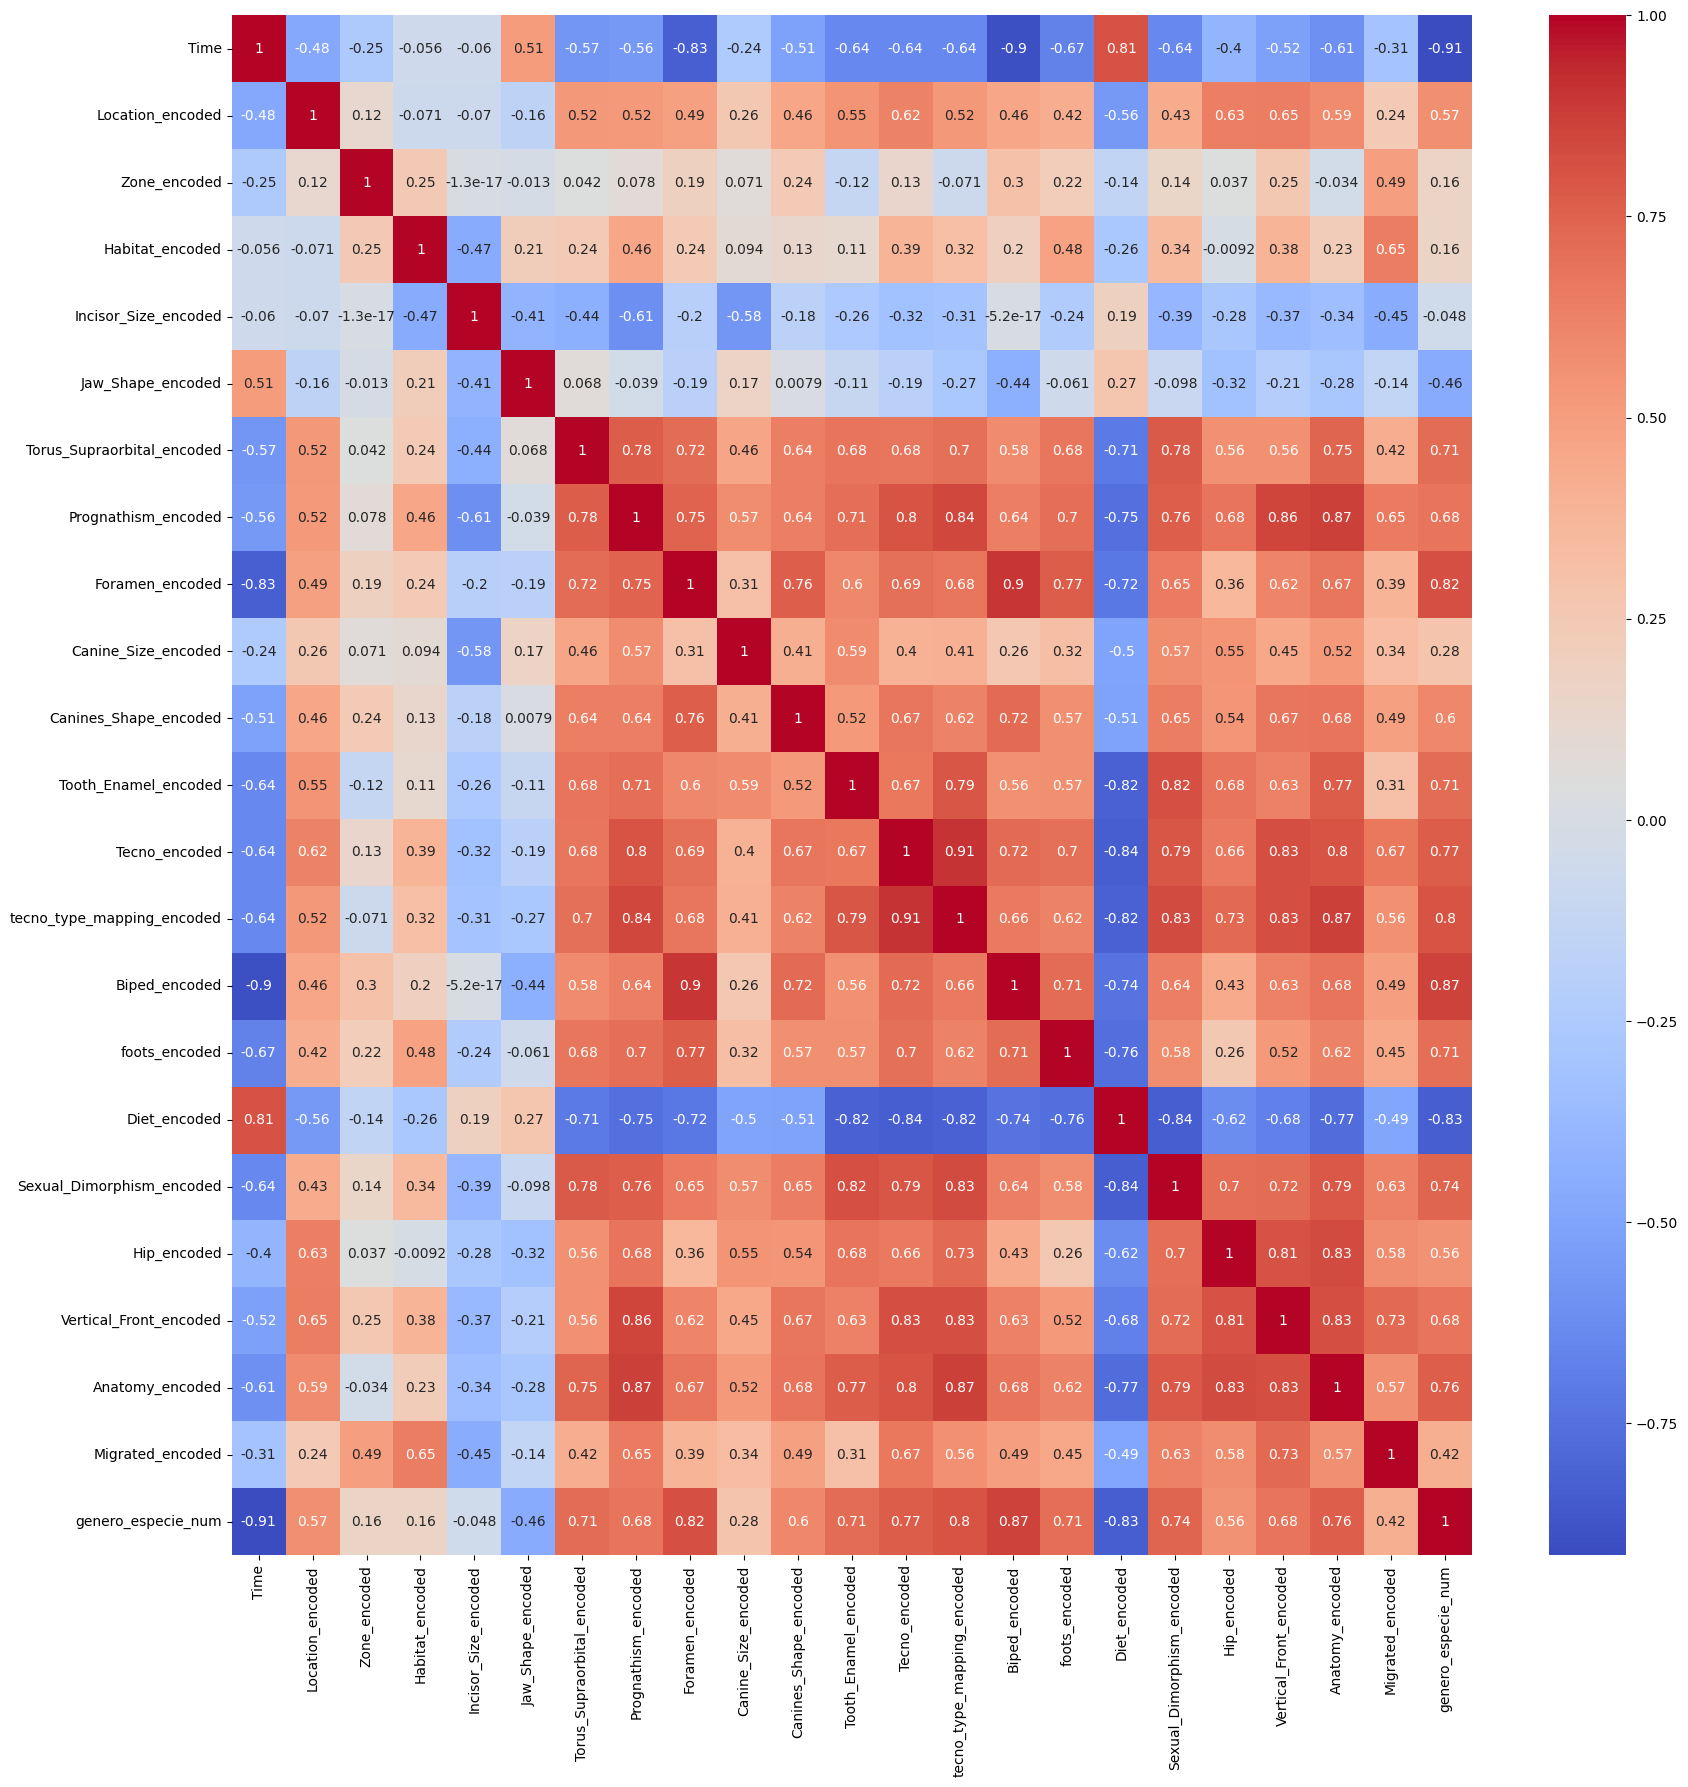

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [16]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(train_df.shape)
print(test_df.shape)

train_df.to_csv('../data/train/train2.csv', index=False)
test_df.to_csv('../data/test/test2.csv', index=False)

(9600, 25)
(2400, 25)


In [17]:
df_train= pd.read_csv('../data/train/train2.csv')
df_test= pd.read_csv('../data/test/test2.csv')

In [18]:
df_train

,Genus_&_Specie,genero_etiqueta,Time,Location_encoded,Zone_encoded,Habitat_encoded,Incisor_Size_encoded,Jaw_Shape_encoded,Torus_Supraorbital_encoded,Prognathism_encoded,...,tecno_type_mapping_encoded,Biped_encoded,foots_encoded,Diet_encoded,Sexual_Dimorphism_encoded,Hip_encoded,Vertical_Front_encoded,Anatomy_encoded,Migrated_encoded,genero_especie_num
0,Homo Erectus,Homo temprano,1.576796,1,3,0.333333,1,2,3,4,...,2,3,1,1,1,2,2,2,1,17
1,Australopithecus Afarensis,Australopithecus,3.838121,0,1,0.250000,4,3,1,1,...,0,2,1,4,0,0,0,0,0,5
2,Homo Erectus,Homo temprano,1.719525,1,3,0.333333,1,2,3,4,...,2,3,1,1,1,2,2,2,1,17
3,Homo Floresiensis,Otros,0.910479,1,1,0.041667,2,3,3,2,...,2,3,1,1,1,1,0,1,0,19
4,Homo Antecesor,Homo temprano,0.791006,2,3,0.333333,3,3,3,3,...,2,3,1,1,1,2,2,1,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,Homo Neanderthalensis\n,Homo tardío,0.042605,2,0,0.083333,4,2,3,4,...,4,3,1,0,1,3,2,3,0,23
9596,Homo Naledi,Otros,0.578195,0,2,0.083333,4,3,3,2,...,0,3,1,1,1,1,0,1,0,18
9597,Homo Naledi,Otros,0.591428,0,2,0.083333,4,3,3,2,...,0,3,1,1,1,1,0,1,0,18
9598,Homo Rudolfensis,Homo temprano,2.238249,0,1,0.333333,2,3,2,2,...,0,2,1,3,0,0,0,1,0,14


In [19]:
df_train.columns

Index(['Genus_&_Specie', 'genero_etiqueta', 'Time', 'Location_encoded',
       'Zone_encoded', 'Habitat_encoded', 'Incisor_Size_encoded',
       'Jaw_Shape_encoded', 'Torus_Supraorbital_encoded',
       'Prognathism_encoded', 'Foramen_encoded', 'Canine_Size_encoded',
       'Canines_Shape_encoded', 'Tooth_Enamel_encoded', 'Tecno_encoded',
       'tecno_type_mapping_encoded', 'Biped_encoded', 'foots_encoded',
       'Diet_encoded', 'Sexual_Dimorphism_encoded', 'Hip_encoded',
       'Vertical_Front_encoded', 'Anatomy_encoded', 'Migrated_encoded',
       'genero_especie_num'],
      dtype='object')

In [20]:
X=df_train[['Time','Biped_encoded','Foramen_encoded','Torus_Supraorbital_encoded','Tecno_encoded','Diet_encoded','Anatomy_encoded','Location_encoded','Tooth_Enamel_encoded','Canine_Size_encoded']]
y= df_train['genero_especie_num']
print(X.shape)
print(y.shape)

(9600, 10)
(9600,)


In [21]:
X1=df_test[['Time','Biped_encoded','Foramen_encoded','Torus_Supraorbital_encoded','Tecno_encoded','Diet_encoded','Anatomy_encoded','Location_encoded','Tooth_Enamel_encoded','Canine_Size_encoded']]
y1= df_test['genero_especie_num']

#### Esto lo he hecho para las etiquetas de la matriz de confusion

In [115]:
nombres_hominidos = {
    'hominino Orrorin tugenencin': 0,
    'hominino Sahelanthropus tchadensis': 1,
    'hominino Ardipithecus ramidus / kabadda': 2,
    'Ardipithecus Ramidus / Kadabba': 3,
    'Australopithecus Anamensis': 4,
    'Australopithecus Afarensis': 5,
    'Australopithecus Bahrelghazali': 6,
    'Australopithecus Africanus': 7,
    'Australopithecus Garhi': 8,
    'Australopithecus Sediba': 9,
    'Paranthropus Aethiopicus': 10,
    'Paranthropus Robustus': 11,
    'Paranthropus Boisei': 12,
    'Homo Habilis': 13,
    'Homo Rudolfensis': 14,
    'Homo Georgicus': 15,
    'Homo Ergaster': 16,
    'Homo Erectus': 17,
    'Homo Naledi': 18,
    'Homo Floresiensis': 19,
    'Homo Antecesor': 20,
    'Homo Heidelbergensis': 21,
    'Homo Rodhesiensis': 22,
    'Homo Neanderthalensis\n': 23,
    'Homo Sapiens': 24   
}

lista_nombres_hominidos = list(nombres_hominidos.keys())
lista_nombres_hominidos

['hominino Orrorin tugenencin',
 'hominino Sahelanthropus tchadensis',
 'hominino Ardipithecus ramidus / kabadda',
 'Ardipithecus Ramidus / Kadabba',
 'Australopithecus Anamensis',
 'Australopithecus Afarensis',
 'Australopithecus Bahrelghazali',
 'Australopithecus Africanus',
 'Australopithecus Garhi',
 'Australopithecus Sediba',
 'Paranthropus Aethiopicus',
 'Paranthropus Robustus',
 'Paranthropus Boisei',
 'Homo Habilis',
 'Homo Rudolfensis',
 'Homo Georgicus',
 'Homo Ergaster',
 'Homo Erectus',
 'Homo Naledi',
 'Homo Floresiensis',
 'Homo Antecesor',
 'Homo Heidelbergensis',
 'Homo Rodhesiensis',
 'Homo Neanderthalensis\n',
 'Homo Sapiens']

## PRIMER MODELO DE RANDOM FOREST CON PCA Y SCALER

In [49]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'pca__n_components': [8,9,10],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [3, 5, 10],
    'classifier__max_leaf_nodes': [9,10,1116, 20]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=10, random_state=42,verbose= 2)


rs=random_search.fit(X, y)

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END classifier__max_depth=5, classifier__max_leaf_nodes=10, classifier__n_estimators=500, pca__n_components=8; total time=   3.3s
[CV] END classifier__max_depth=5, classifier__max_leaf_nodes=10, classifier__n_estimators=500, pca__n_components=8; total time=   3.3s
[CV] END classifier__max_depth=5, classifier__max_leaf_nodes=10, classifier__n_estimators=500, pca__n_components=8; total time=   3.2s
[CV] END classifier__max_depth=5, classifier__max_leaf_nodes=10, classifier__n_estimators=500, pca__n_components=8; total time=   3.2s
[CV] END classifier__max_depth=5, classifier__max_leaf_nodes=10, classifier__n_estimators=500, pca__n_components=8; total time=   3.2s
[CV] END classifier__max_depth=3, classifier__max_leaf_nodes=10, classifier__n_estimators=100, pca__n_components=8; total time=   0.4s
[CV] END classifier__max_depth=3, classifier__max_leaf_nodes=10, classifier__n_estimators=100, pca__n_components=8; total time=  

In [50]:
be=rs.best_estimator_.fit(X,y)

In [51]:
y_pred_rf_pca_test1=be.predict(X1)
y_pred_rf_pca_test1_pproba = be.predict_proba(X1)

In [52]:
y_pred_rf_pca_test1

array([6, 4, 7, ..., 2, 4, 0], dtype=int64)

In [53]:
precision1 = precision_score(y1, y_pred_rf_pca_test1,average='weighted')
recall1 = recall_score(y1, y_pred_rf_pca_test1,average='weighted')
f11 = f1_score(y1, y_pred_rf_pca_test1,average='weighted')

roc_auc1= roc_auc_score(y1,y_pred_rf_pca_test1_pproba,average='weighted',multi_class='ovo')
print("Precision:", precision1)
print("Recall:", recall1)
print("F1-score:", f11)
print('ROC AUC score:', roc_auc1)

Precision: 0.9016140555292812
Recall: 0.8804166666666666
F1-score: 0.8743238772960383
ROC AUC score: 0.9954614518447147


[[113   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 105   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 104   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  64  44   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  92   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 103   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  98   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  73   0  42   0   0   0   0   0   0
    0   0   0   0

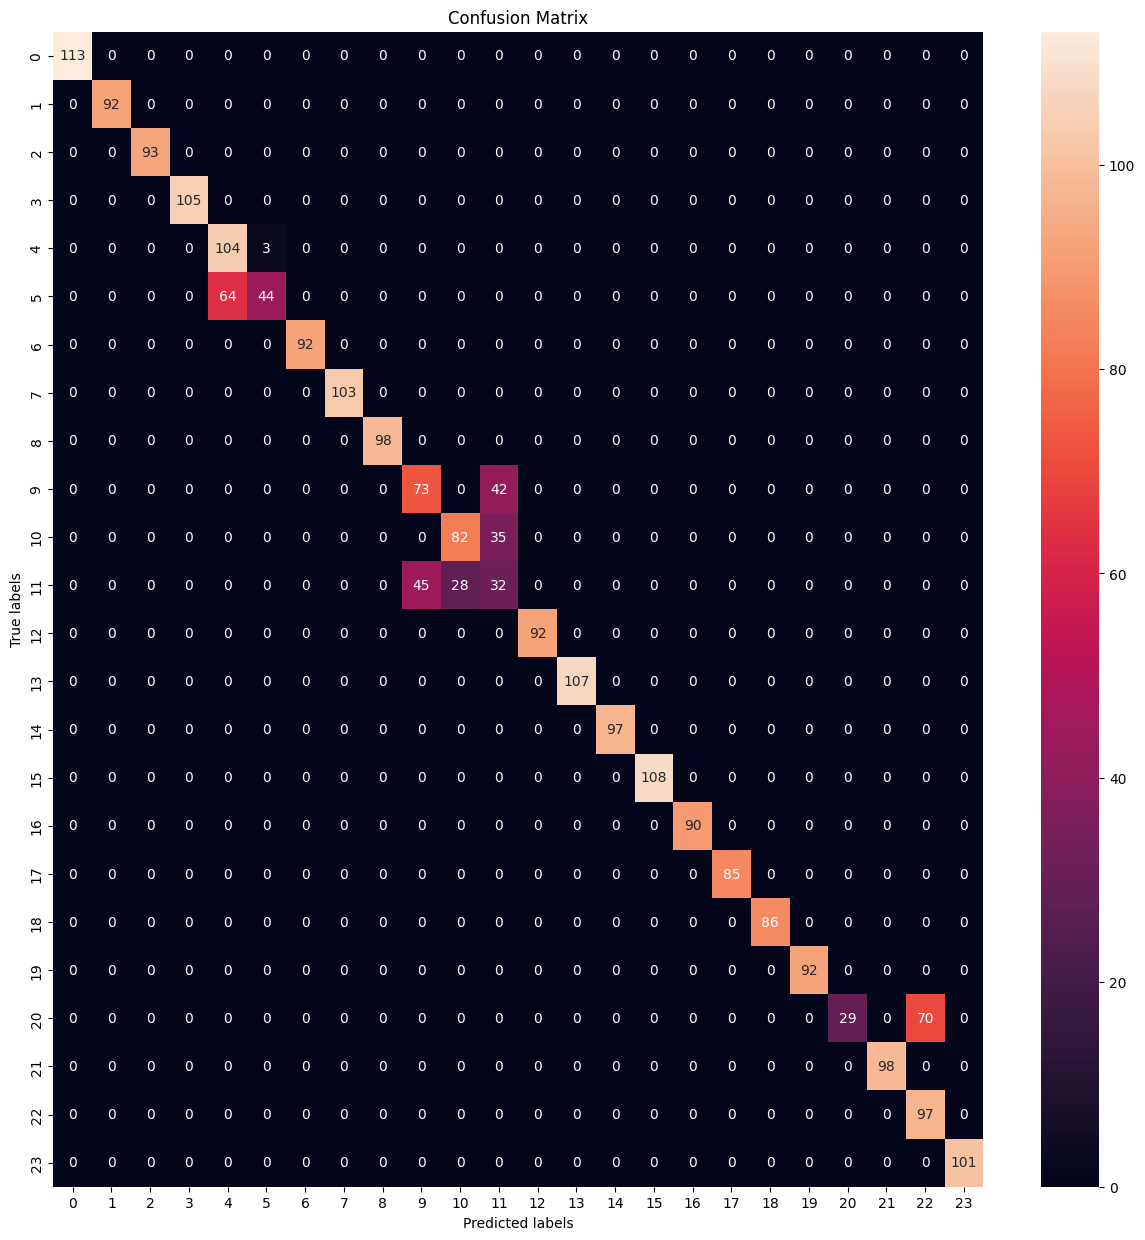

In [54]:

plt.figure(figsize=(15,15))
c_matrix = confusion_matrix(y1,y_pred_rf_pca_test1)
#print(c_matrix)
sns.heatmap(c_matrix, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [57]:
import pickle

filename = '../models/rf1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be, archivo_salida)

In [58]:
with open(filename, 'rb') as archivo_entrada:
    rf1 = pickle.load(archivo_entrada)

## SEGUNDO MODELO DE RANDOM FOREST CON SCALER Y PCA

In [82]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [8,9,10],
    'classifier__n_estimators': [100, 500, 1000],
    'classifier__max_depth': [5,6,7,8],
    'classifier__max_leaf_nodes': [11,16, 20]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=10,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.8923958333333335
Best Parameters: {'scaler': None, 'pca__n_components': 8, 'classifier__n_estimators': 1000, 'classifier__max_leaf_nodes': 16, 'classifier__max_depth': 6}


In [83]:
be1=rs.best_estimator_.fit(X,y)

In [119]:
importances = be1.named_steps['classifier'].feature_importances_
importances

array([0.11293149, 0.0922869 , 0.16615585, 0.1572431 , 0.15081116,
       0.12505381, 0.09099509, 0.1045226 ])

In [84]:
y_pred_rf_pca_test1_2=be1.predict(X1)
y_pred_rf_pca_test1_pproba_2 = be1.predict_proba(X1)

In [86]:
precision2 = precision_score(y1, y_pred_rf_pca_test1_2,average='weighted')
recall2 = recall_score(y1, y_pred_rf_pca_test1_2,average='weighted')
f12 = f1_score(y1, y_pred_rf_pca_test1_2,average='weighted')
accuracy2=accuracy_score(y1,y_pred_rf_pca_test1_2)

roc_auc2= roc_auc_score(y1,y_pred_rf_pca_test1_pproba_2,average='weighted',multi_class='ovo')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)
print('ROC AUC score:', roc_auc2)
print('Accuracy',accuracy2)

Precision: 0.9270974561603688
Recall: 0.87375
F1-score: 0.8646202154179863
ROC AUC score: 0.9953977834795791
Accuracy 0.87375


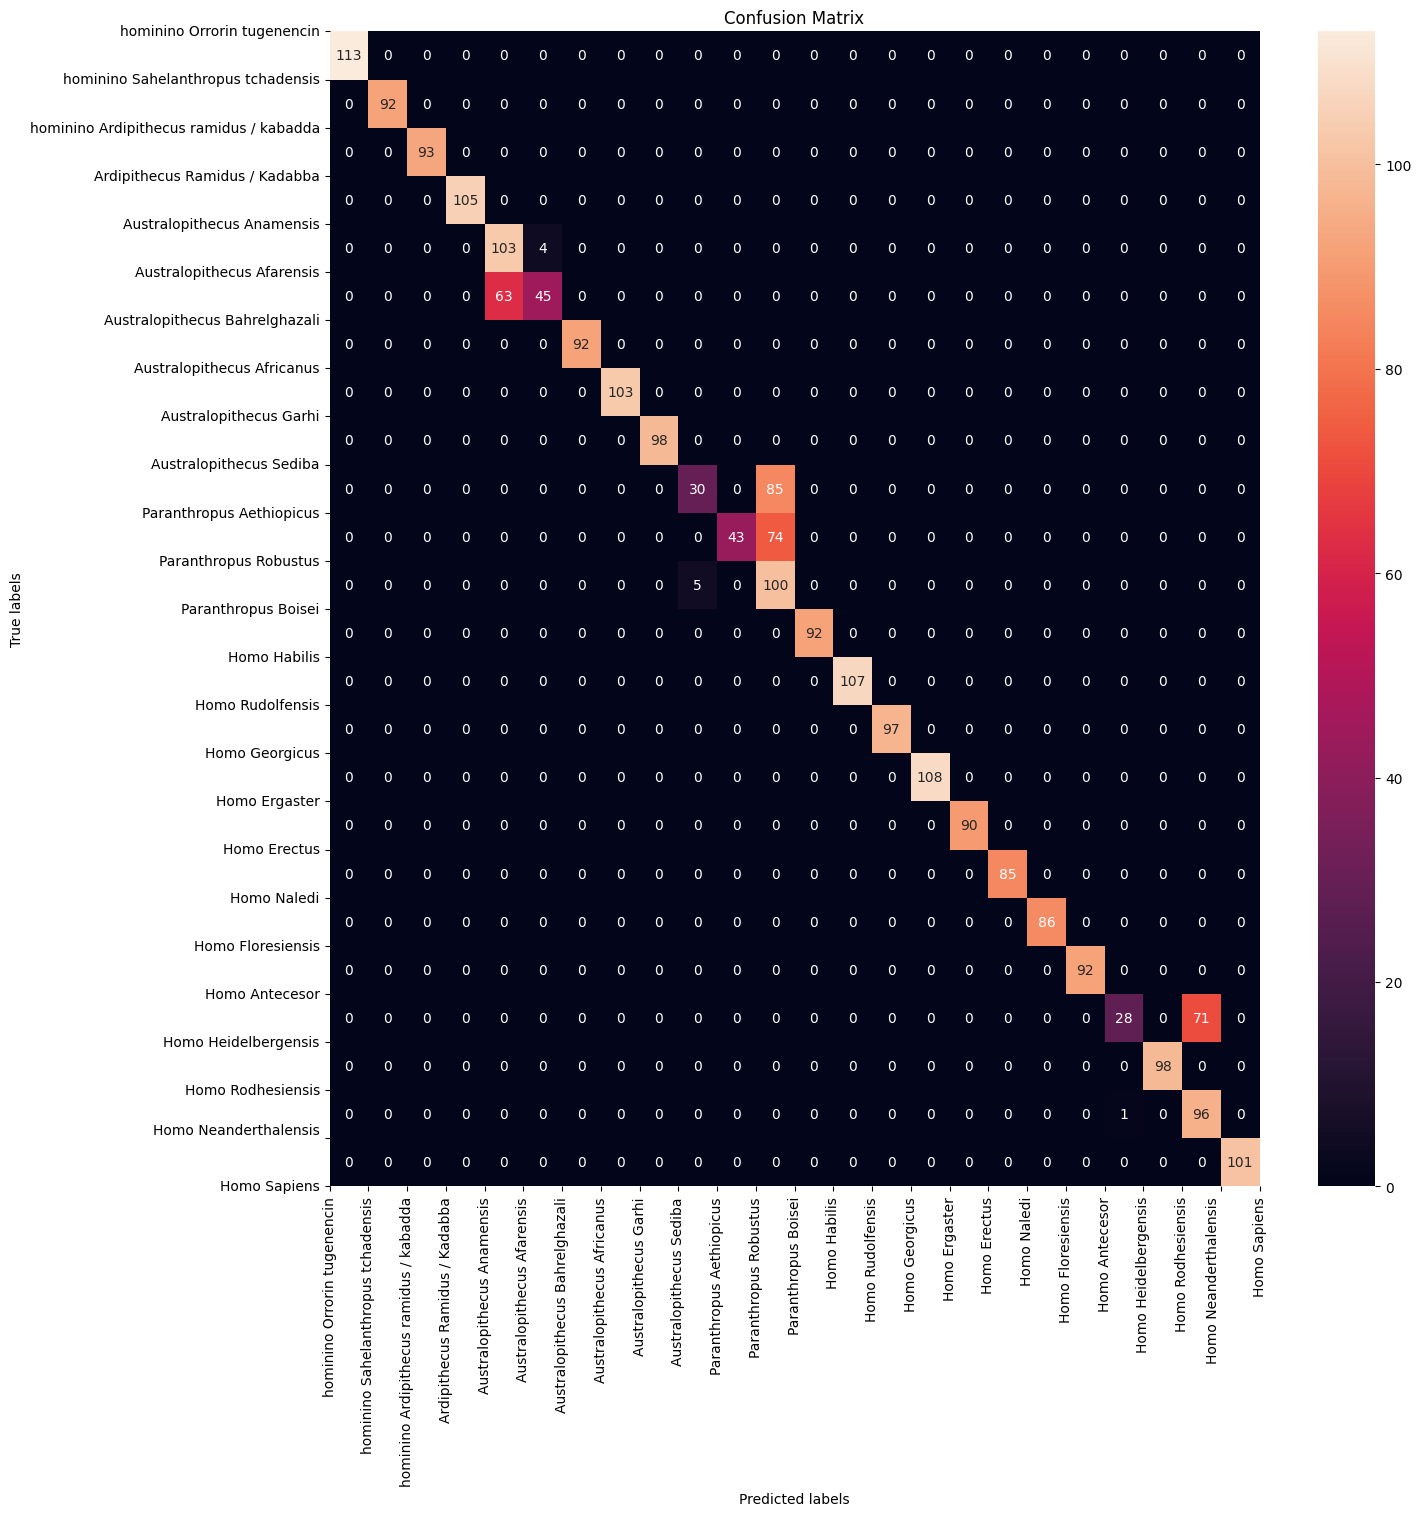

In [116]:
plt.figure(figsize=(15,15))
c_matrix1 = confusion_matrix(y1,y_pred_rf_pca_test1_2)
sns.heatmap(c_matrix1, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.xticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.yticks(rotation=360)
plt.yticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.title('Confusion Matrix')
plt.show();

In [25]:
import pickle

filename = './models/rf2.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be1, archivo_salida)

## TERCER MODELO DE RANDOM FOREST PARA INTENTAR MEJORAR EL RECALL

In [96]:
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
]

pipeline = Pipeline(steps)

param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [8,9,10],
    'classifier__n_estimators': [100,500,600],
    'classifier__max_depth': [5,6,7],
    'classifier__max_leaf_nodes': [17,18,19]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, n_iter=20,n_jobs=-1, random_state=42,verbose= 2)


rs=random_search.fit(X, y)

best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score: 0.8920833333333335
Best Parameters: {'scaler': MinMaxScaler(), 'pca__n_components': 10, 'classifier__n_estimators': 600, 'classifier__max_leaf_nodes': 19, 'classifier__max_depth': 6}


In [97]:
be_rf_2=rs.best_estimator_.fit(X,y)

In [98]:
y_pred_rf_pca_test1_3=be_rf_2.predict(X1)
y_pred_rf_pca_test1_pproba_3 = be_rf_2.predict_proba(X1)

In [99]:
precision7 = precision_score(y1, y_pred_rf_pca_test1_3,average='weighted')
recall7 = recall_score(y1, y_pred_rf_pca_test1_3,average='weighted')
f17 = f1_score(y1, y_pred_rf_pca_test1_3,average='weighted')
accuracy7=accuracy_score(y1,y_pred_rf_pca_test1_3)

roc_auc7= roc_auc_score(y1,y_pred_rf_pca_test1_pproba_3,average='weighted',multi_class='ovo')
print("Precision:", precision7)
print("Recall:", recall7)
print("F1-score:", f17)
print('ROC AUC score:', roc_auc7)
print('Accuracy',accuracy7)

Precision: 0.9122790757792802
Recall: 0.8795833333333334
F1-score: 0.8732245308172732
ROC AUC score: 0.9954005376022984
Accuracy 0.8795833333333334


In [ ]:
sns.heatmap(confusion_matrix(Y, preds, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

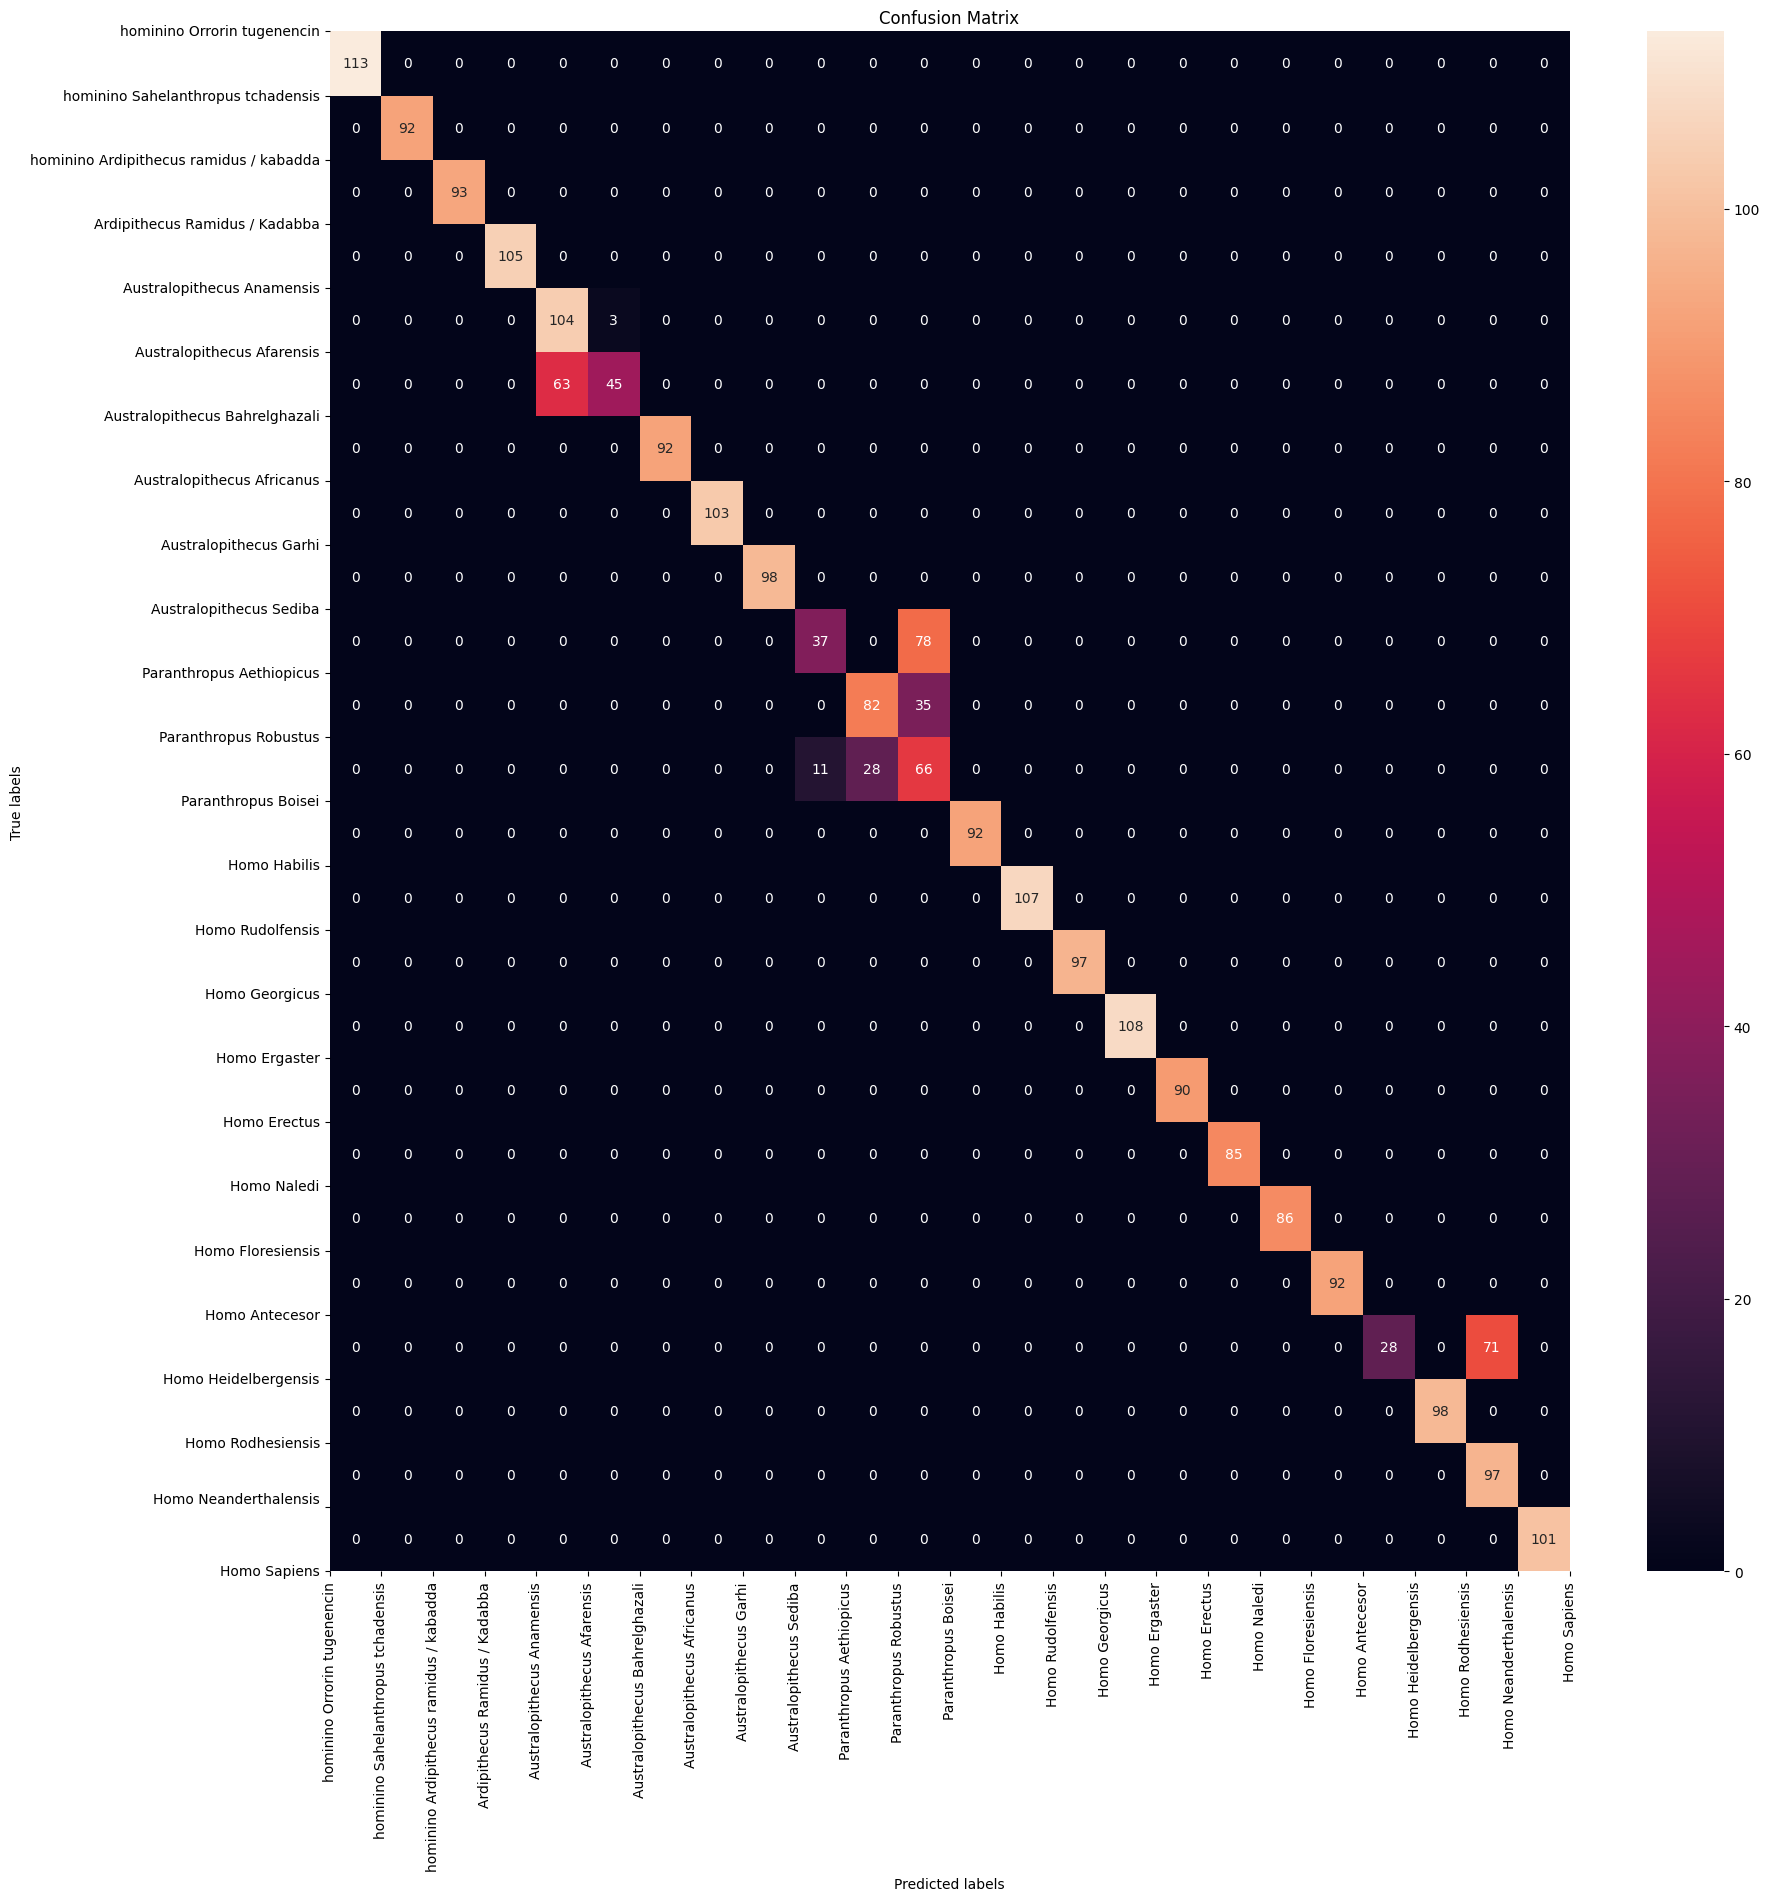

In [114]:
plt.figure(figsize=(20,20))
c_matrix_rf_2 = confusion_matrix(y1,y_pred_rf_pca_test1_3)
sns.heatmap(c_matrix_rf_2, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.xticks(rotation=90)
plt.xticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.yticks(rotation=360)
plt.yticks(range(len(lista_nombres_hominidos)), lista_nombres_hominidos)
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

## PRIMER MODELO DE LINEAR REGRESSION CON SCALER Y PCA

In [36]:


# Define steps for the Logistic Regression pipeline
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('reg', LogisticRegression())  # Replace Ridge with LogisticRegression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [8, 9, 10],
    'reg__penalty': ['l1', 'l2'],
    'reg__C': np.logspace(-4, 4, 100),  # Range of regularization parameter C
    'reg__solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'reg__max_iter': [100, 200, 500],
    'reg__class_weight': [None, 'balanced'],
    'reg__multi_class': ['ovr', 'multinomial']
}

# Define RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Execute the search
rs = random_search.fit(X, y)  # Assuming X and y are your data

# Get best score and parameters
best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\teres\AppData\

Best Score: 0.8913541666666667
Best Parameters: {'scaler': None, 'reg__solver': 'newton-cg', 'reg__penalty': 'l2', 'reg__multi_class': 'ovr', 'reg__max_iter': 100, 'reg__class_weight': None, 'reg__C': 890.2150854450392, 'pca__n_components': 10}


In [37]:
be_reglog1=rs.best_estimator_.fit(X,y)
y_pred_rl_pca_test1_1=be_reglog1.predict(X1)
y_pred_rl_pca_test1_pproba_1 = be_reglog1.predict_proba(X1)

In [69]:
precision3 = precision_score(y1, y_pred_rl_pca_test1_1,average='weighted')
recall3 = recall_score(y1, y_pred_rl_pca_test1_1,average='weighted')
f13 = f1_score(y1, y_pred_rl_pca_test1_1,average='weighted')
accuracy3=accuracy_score(y1,y_pred_rl_pca_test1_1,average='weighted')

roc_auc3= roc_auc_score(y1,y_pred_rl_pca_test1_pproba_1,average='weighted',multi_class='ovo')
print("Precision:", precision3)
print("Recall:", recall3)
print("F1-score:", f13)
print('ROC AUC score:', roc_auc3)
print('Accuracy',accuracy3)

TypeError: got an unexpected keyword argument 'average'

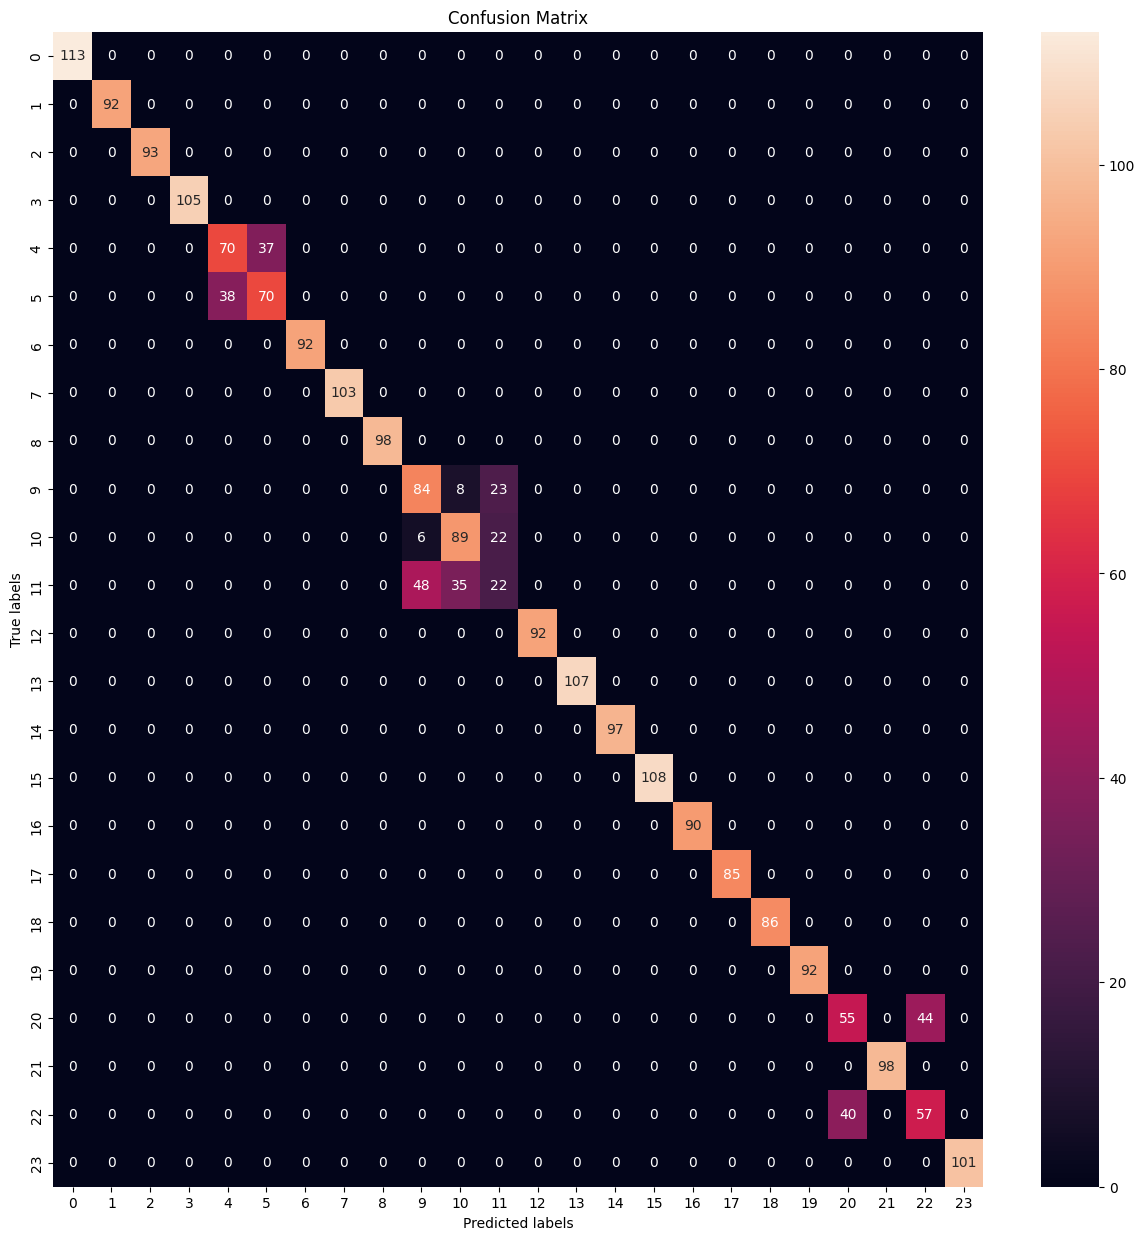

In [39]:
plt.figure(figsize=(15,15))
c_matrix2 = confusion_matrix(y1,y_pred_rl_pca_test1_1)
sns.heatmap(c_matrix2, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [40]:
import pickle

filename = './models/rl1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_reglog1, archivo_salida)

### MODELO DE KNN

In [43]:
# Define steps for the KNN pipeline
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [8, 9, 10],
    'knn__n_neighbors': [ 10, 15, 20],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [10, 20, 30, 40, 50],
    'knn__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Define RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Execute the search
rs = random_search.fit(X, y)  # Assuming X and y are your data

# Get best score and parameters
best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.8932291666666666
Best Parameters: {'scaler': None, 'pca__n_components': 8, 'knn__weights': 'uniform', 'knn__p': 2, 'knn__n_neighbors': 10, 'knn__leaf_size': 10, 'knn__algorithm': 'brute'}


In [44]:
be_knn1=rs.best_estimator_.fit(X,y)
y_pred_knn_pca_test1_1=be_knn1.predict(X1)


c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\teres\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Precision: 0.8809319138445448
Recall: 0.8829166666666667
F1-score: 0.8811060334245185


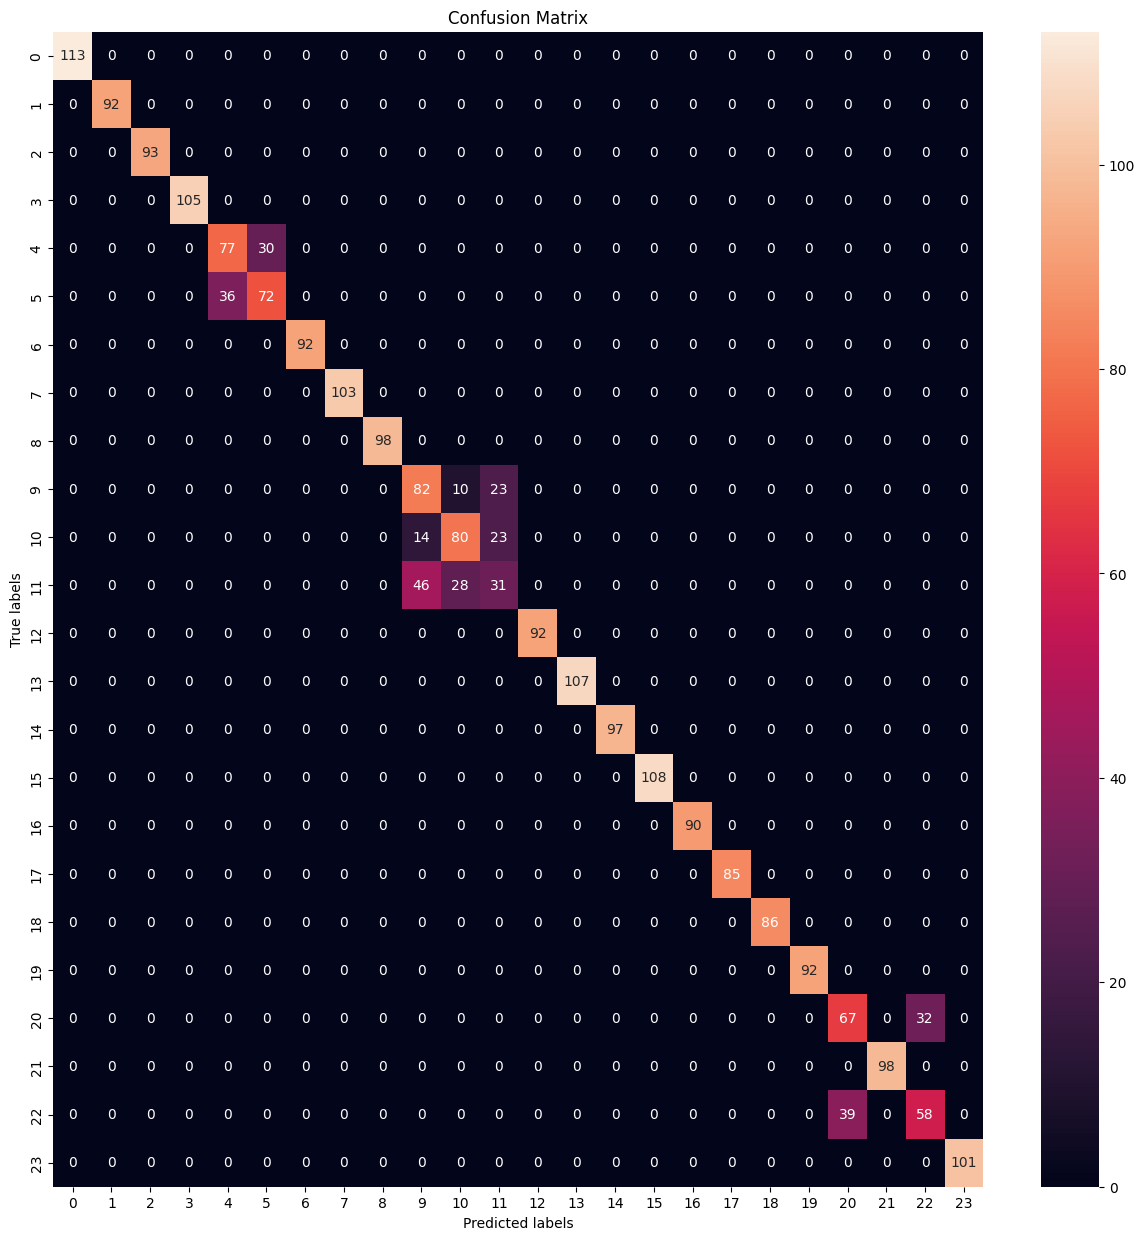

In [59]:
precision4 = precision_score(y1, y_pred_knn_pca_test1_1,average='weighted')
recall4 = recall_score(y1, y_pred_knn_pca_test1_1,average='weighted')
f14 = f1_score(y1, y_pred_knn_pca_test1_1,average='weighted')

conf_matrix_knn = confusion_matrix(y1, y_pred_knn_pca_test1_1)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1-score:", f14)

plt.figure(figsize=(15,15))
c_matrix3 = confusion_matrix(y1,y_pred_knn_pca_test1_1)
sns.heatmap(conf_matrix_knn, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();


In [47]:
import pickle

filename = './models/knn1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_knn1, archivo_salida)

## MODELO CON SUPPORT VECTOR MACHINE

In [58]:
# Define steps for the SVM pipeline
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC())
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [8, 9, 10],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svm__C': np.logspace(-3, 3, 7),
    'svm__gamma': ['scale', 'auto']
}

# Define RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Execute the search
rs = random_search.fit(X, y)  # Assuming X and y are your data

# Get best score and parameters
best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.8903125000000001
Best Parameters: {'svm__kernel': 'rbf', 'svm__gamma': 'scale', 'svm__C': 1000.0, 'scaler': MinMaxScaler(), 'pca__n_components': 10}


In [60]:
be_svm1=rs.best_estimator_.fit(X,y)
y_pred_svm_pca_test1_1=be_svm1.predict(X1)

Precision: 0.8748909315909316
Recall: 0.87125
F1-score: 0.8726561781598877


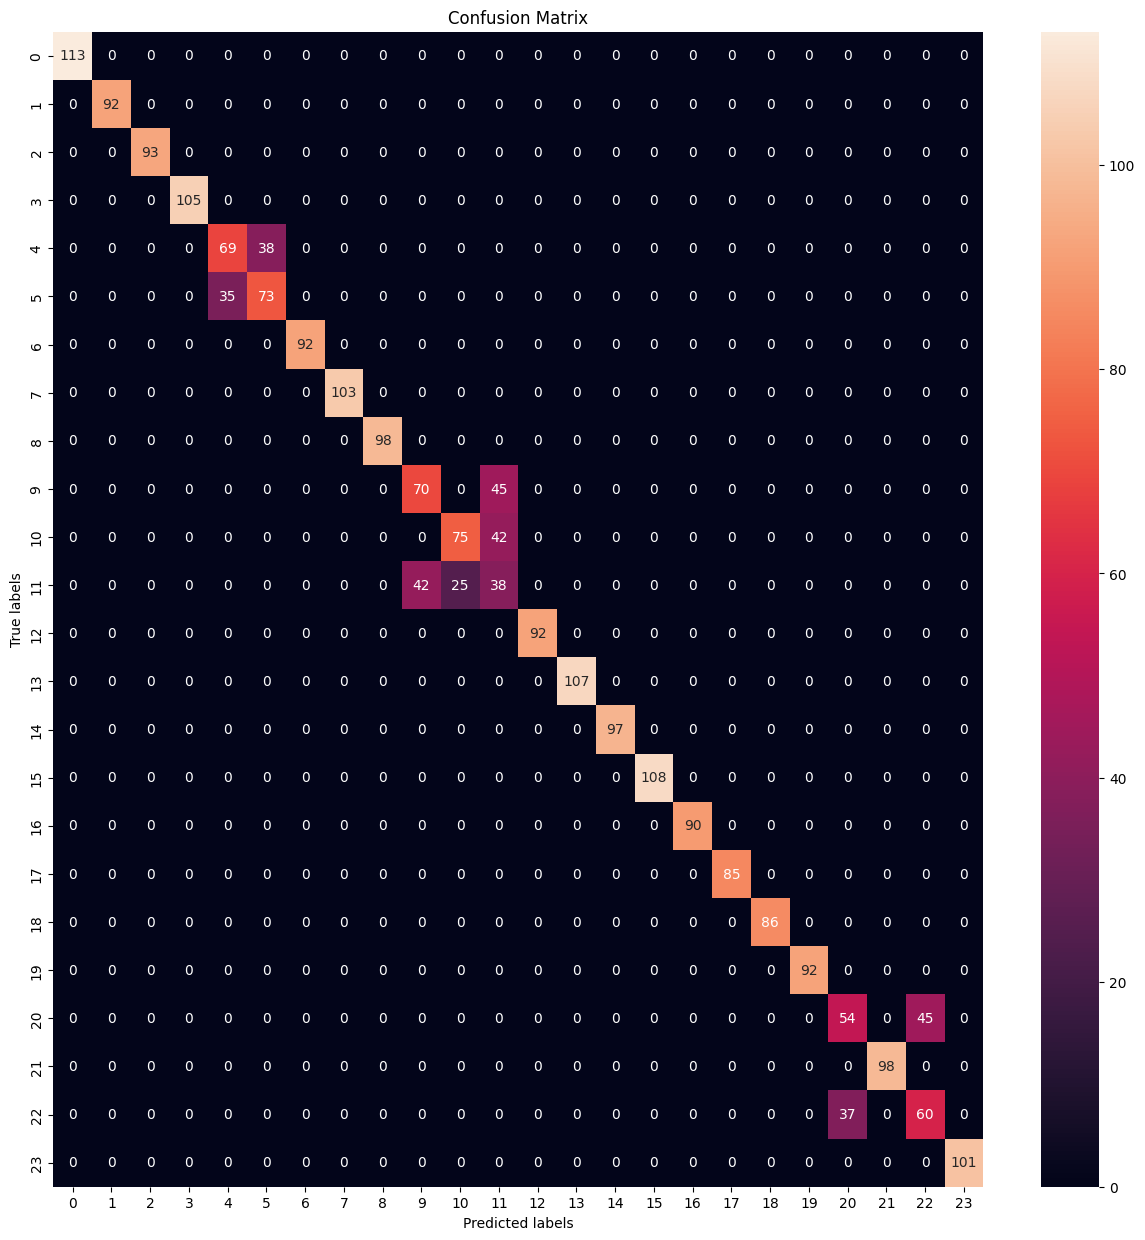

In [67]:
precision5 = precision_score(y1, y_pred_svm_pca_test1_1,average='weighted')
recall5 = recall_score(y1, y_pred_svm_pca_test1_1,average='weighted')
f15 = f1_score(y1, y_pred_svm_pca_test1_1,average='weighted')

conf_matrix_svm = confusion_matrix(y1, y_pred_svm_pca_test1_1)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1-score:", f15)

plt.figure(figsize=(15,15))
c_matrix_svm = confusion_matrix(y1,y_pred_knn_pca_test1_1)
sns.heatmap(conf_matrix_svm, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();


In [62]:
import pickle

filename = './models/svm1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_svm1, archivo_salida)

## MODELO CON GRADIENT BOOSTING CLASSIFIER

In [64]:
# Define steps for the Gradient Boosting pipeline
steps = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('gb', GradientBoostingClassifier())
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'scaler': [None, StandardScaler(), MinMaxScaler()],
    'pca__n_components': [8, 9, 10],
    'gb__n_estimators': [100, 500, 1000],
    'gb__learning_rate': np.logspace(-3, 0, 10),
    'gb__max_depth': [3, 5, 7, 9],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
    'gb__subsample': [0.5, 0.7, 0.9, 1]
}

# Define RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    cv=5,
    n_iter=10,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Execute the search
rs = random_search.fit(X, y)  # Assuming X and y are your data

# Get best score and parameters
best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score:", best_score)
print("Best Parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score: 0.8896875
Best Parameters: {'scaler': None, 'pca__n_components': 8, 'gb__subsample': 1, 'gb__n_estimators': 100, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 1, 'gb__max_depth': 3, 'gb__learning_rate': 0.021544346900318832}


In [65]:
be_gbc1=rs.best_estimator_.fit(X,y)
y_pred_gbc_pca_test1_1=be_gbc1.predict(X1)

Precision: 0.8832219006797669
Recall: 0.8779166666666667
F1-score: 0.8743003545171006


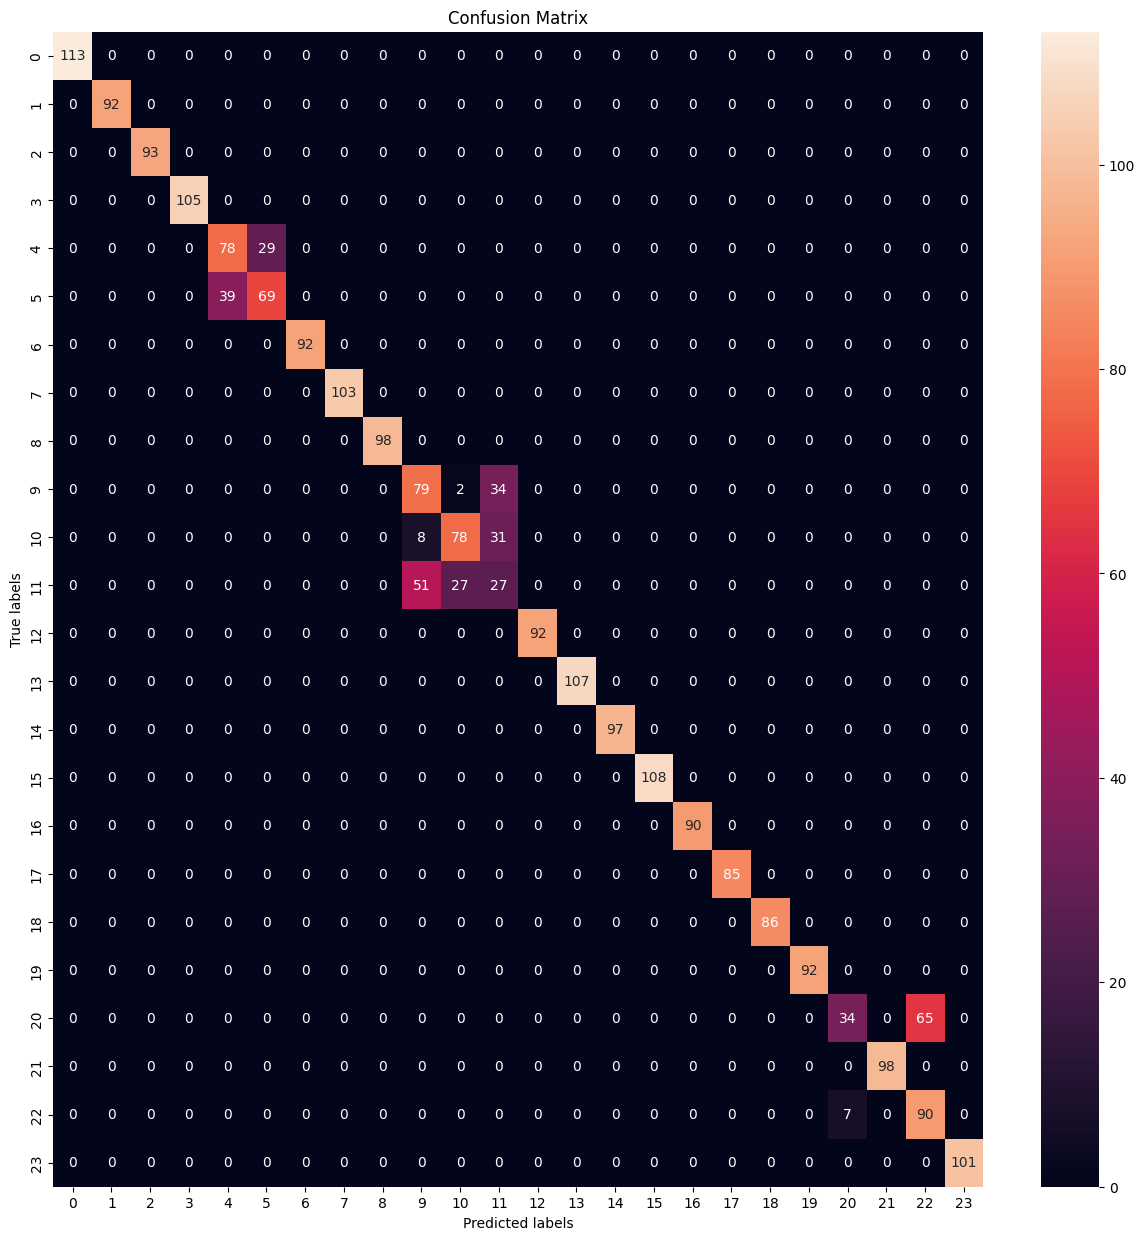

In [66]:
precision6 = precision_score(y1, y_pred_gbc_pca_test1_1,average='weighted')
recall6 = recall_score(y1, y_pred_gbc_pca_test1_1,average='weighted')
f16 = f1_score(y1, y_pred_gbc_pca_test1_1,average='weighted')

conf_matrix_gbc = confusion_matrix(y1, y_pred_gbc_pca_test1_1)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1-score:", f16)

plt.figure(figsize=(15,15))
c_matrix_gbc = confusion_matrix(y1,y_pred_gbc_pca_test1_1)
sns.heatmap(conf_matrix_gbc, annot=True,fmt= 'd')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show();

In [68]:
import pickle

filename = './models/gbc1.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(be_gbc1, archivo_salida)